In [ ]:
import cv2
import numpy as np

def Pharmaceutical_Detection(path):    
    image_path = path
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)
    edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    stuts = "0"
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000: 
            stuts = "1"            
    return  stuts   

print(Pharmaceutical_Detection('trining/545457854.jpg'))

: 

In [24]:
import cv2
import numpy as np

# قراءة الصورة
image_path = 'trining/654631.png'
image = cv2.imread(image_path)

# تحويل الصورة إلى درجات الرمادي
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# تقليل الضوضاء
blurred_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# اكتشاف الحواف
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# البحث عن الكائنات (الختم)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    global stuts
    area = cv2.contourArea(contour)
    if area > 1000: 
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        stuts="الختم موجود: المنتج أصلي"
    else:
        stuts="الختم غير موجود"
        

cv2.imshow('Detected Stamps', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
print(stuts)


الختم غير موجود


In [322]:
import cv2
import numpy as np

# قراءة الصورة
image_path = 'testing/2.jpg'
image = cv2.imread(image_path)

# تحويل الصورة إلى درجات الرمادي
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# تقليل الضوضاء
blurred_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# اكتشاف الحواف
edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)

# البحث عن الكائنات (الختم)
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# تصفية الكائنات
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 1000:  # تحديد حجم الكائن المرغوب فيه
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# عرض الصورة مع الكائنات المعرفة
cv2.imshow('Detected Stamps', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [121]:
import cv2
from pyzbar.pyzbar import decode

def read_qr_code(image_path):
    image = cv2.imread(image_path)
    decoded_objects = decode(image)
    
    if len(decoded_objects) > 0:
        qr_code_data = decoded_objects[0].data.decode("utf-8")
        return qr_code_data
    else:
        return None

# استدعاء الدالة وتمرير مسار صورة QR Code كمعامل
qr_code_data = read_qr_code("training/image_1.jpg")

if qr_code_data is not None:
    print("تم استخراج الرقم: ", qr_code_data)
else:
    print("لم يتم العثور على رمز QR.")
    

لم يتم العثور على رمز QR.


In [281]:
import string

# قائمة الأحرف المسموح بها
char_list = string.ascii_letters + string.digits + 'ابتثجحخدذرزسشصضطظعغفقكلمنهوي'

def encode_to_labels(txt):
    # ترميز النص إلى تسلسل أرقام باستخدام char_list
    dig_lst = []
    for char in txt:
        try:
            dig_lst.append(char_list.index(char))
        except ValueError:
            print(char)
    
    return dig_lst
print(encode_to_labels('الوكيل الوحيد'))

 
[62, 84, 88, 83, 89, 84, 62, 84, 88, 67, 89, 69]


المودل 

MobileNetV2 هو خوارزمية للتعلم العميق (Deep Learning) تستخدم في مجال معالجة الصور والرؤية الحاسوبية على الأجهزة المحمولة. تم تطويرها بواسطة فريق Google Brain وتم إصدارها في عام 2018.

MobileNetV2 تعتبر تطويرًا للإصدار السابق MobileNetV1، وتهدف إلى تحسين الأداء وتقليل التكلفة المحسوسة للتشغيل على الأجهزة ذات الموارد المحدودة مثل الهواتف المحمولة.

تعتمد خوارزمية MobileNetV2 على الهندسة المعمارية العميقة المعروفة باسم "شبكات الاستدلال الرقيقة" (Squeeze-and-Excitation Networks)، والتي تهدف إلى تعزيز الأداء من خلال تحسين تمثيل السمات داخل الشبكة.

ميزة رئيسية لـ MobileNetV2 هي قدرتها على تحقيق التوازن بين الدقة والكفاءة. تستخدم الخوارزمية تقنيات مثل الفصل العميق (Depthwise Separable Convolution) والتصنيف الخطي الحركي (Linear Bottleneck) لتحقيق أداء عالي مع استهلاك منخفض للموارد. يمكن استخدام MobileNetV2 في العديد من التطبيقات مثل التعرف على الصور، والتصنيف، والكشف عن الكائنات.

في النهاية، MobileNetV2 تمثل خوارزمية هامة في مجال رؤية الحاسوب على الأجهزة المحمولة، حيث يتم استخدامها لتحقيق أداء عالي وفعالية موارد محسنة.

In [282]:
import os
import cv2
import numpy as np

def Pharmaceutical_Detection(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)
    edges = cv2.Canny(blurred_image, threshold1=30, threshold2=100)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    status = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 1000:
            status = 1
    return status

def preprocess_images_and_labels(path, target_width, target_height):
    images = []
    labels = []

    for root, _, filenames in os.walk(path):
        for filename in filenames:
            if filename.endswith('.jpg'):
                image_path = os.path.join(root, filename)
                image = cv2.imread(image_path)
                if image is not None:
                    status = Pharmaceutical_Detection(image)
                    if status == 1:
                        resized_image = cv2.resize(image, (target_width, target_height))
                        images.append(resized_image)
                        label = int(filename.split('_')[1].split('.')[0])
                        labels.append(label)

    # تحويل القوائم إلى مصفوفات NumPy
    images = np.array(images)
    labels = np.array(labels)

    return images, labels

# تحديد أبعاد الصور المستهدفة
target_width = 128
target_height = 32

# تحميل الصور والعلامات وتهيئتها
images, labels = preprocess_images_and_labels('training', target_width, target_height)

# حفظ الصور والعلامات كمصفوفات NumPy
np.save('images.npy', images)
np.save('labels.npy', labels)

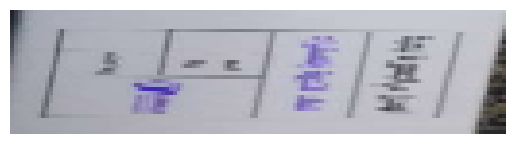

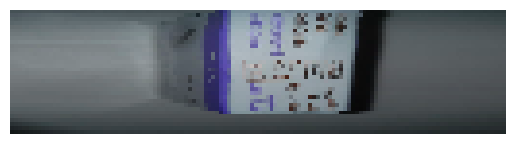

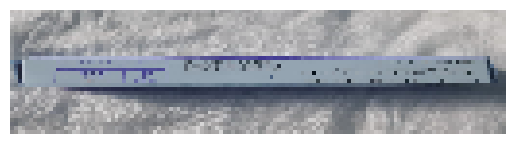

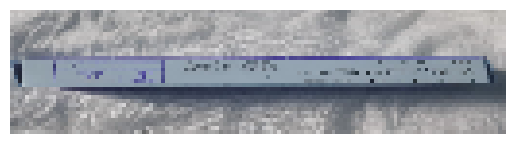

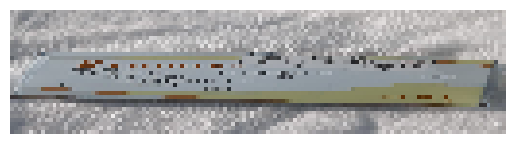

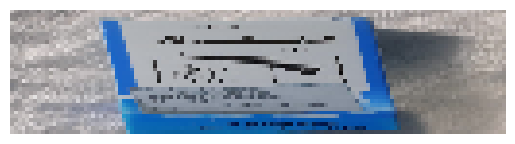

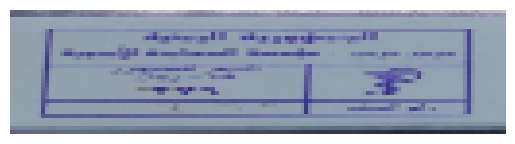

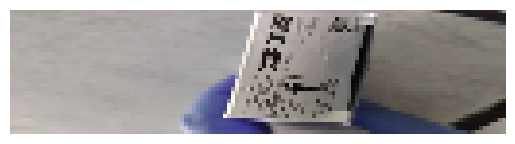

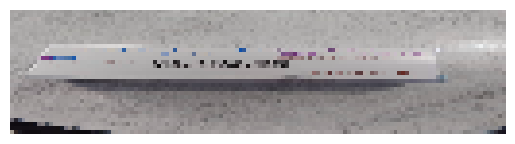

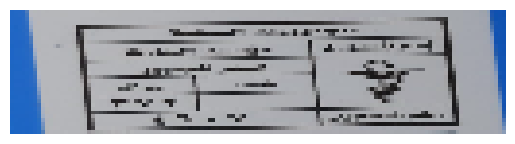

In [283]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# تحميل مصفوفة الصور
images = np.load('images.npy')

# عرض بعض الصور للتحقق منها
for i in range(10):  # عرض أول 10 صور كمثال
    plt.imshow(images[i], cmap='gray')
    plt.axis('off')
    plt.show()

In [284]:

import numpy as np
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

# تحميل البيانات
images = np.load('images.npy')
labels = np.load('labels.npy')
labels -= 1
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10]


In [267]:

# حساب عدد الفئات
num_classes = len(np.unique(labels))

# تحويل العلامات إلى صيغة One-hot encoding
labels = np.eye(num_classes)[labels]

# تحديد عمارة النموذج وإضافة طبقات علوية للتصنيف
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# تجميع النموذج
model = Model(inputs=base_model.input, outputs=predictions)

# تجميد الطبقات الأساسية للحفاظ على الوزن الموجودة
for layer in base_model.layers:
    layer.trainable = False

# تحديد معلم الأمثلة وتجميع النموذج
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج
model.fit(images, labels, epochs=10, batch_size=32, validation_split=0.2)

# تدريب النموذج

# حفظ النموذج بعد التدريب
model.save('pharmaceutical_detection_model.h5')
print('Test Loss:', model.loss)


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 2.4013 - accuracy: 0.1250 - val_loss: 4.4499 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 106ms/step - loss: 0.5980 - accuracy: 1.0000 - val_loss: 5.8047 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 94ms/step - loss: 0.1462 - accuracy: 1.0000 - val_loss: 7.0204 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 100ms/step - loss: 0.0410 - accuracy: 1.0000 - val_loss: 8.1058 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 100ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 9.0748 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 99ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 9.9433 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 91ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 10.7116 - val_accuracy: 0.0000e+

In [239]:
from keras.models import load_model
import cv2
import numpy as np
# تحميل النموذج
loaded = load_model('pharmaceutical_detection_model.h5')
loaded.summary()

Model: "model_23"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_23 (InputLayer)       [(None, None, None, 3)]      0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, None, None, 32)       864       ['input_23[0][0]']            
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, None, None, 32)       128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, None, None, 32)       0         ['bn_Conv1[0][0]']     

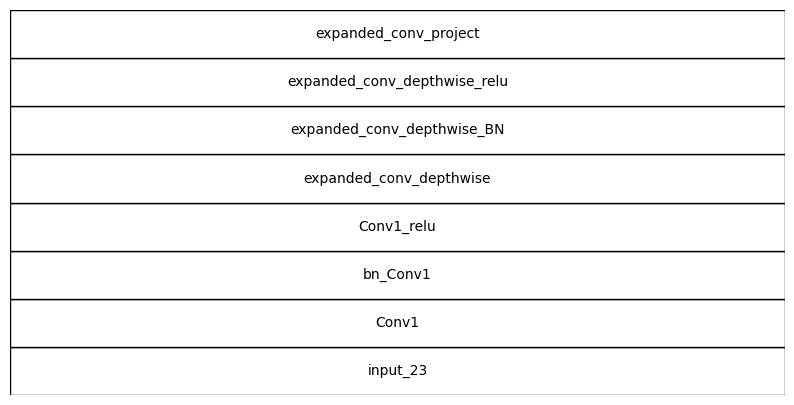

In [268]:
import matplotlib.pyplot as plt

layer_names = ['input_23', 'Conv1', 'bn_Conv1', 'Conv1_relu', 'expanded_conv_depthwise', 'expanded_conv_depthwise_BN', 'expanded_conv_depthwise_relu', 'expanded_conv_project']

num_layers = len(layer_names)
image_size = (10, 5)

fig, ax = plt.subplots(figsize=image_size)

for i, layer_name in enumerate(layer_names):
    ax.add_patch(plt.Rectangle((0, i), 1, 1, edgecolor='black', facecolor='white'))
    ax.text(0.5, i + 0.5, layer_name, ha='center', va='center')

ax.set_xlim(0, 1)
ax.set_ylim(0, num_layers)
ax.axis('off')

plt.show()

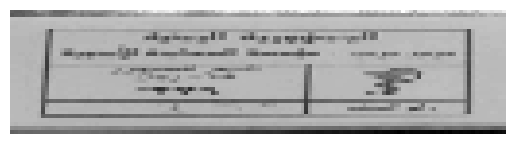

In [286]:
import matplotlib.pyplot as plt
target_width = 128
target_height = 32

def preprocess_image(image_path, target_width, target_height):
    # قراءة الصورة باللون الرمادي
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # تغيير حجم الصورة لتكون متوافقة مع النموذج
    image = cv2.resize(image, (target_width, target_height))
    
    # تحويل نوع البيانات إلى uint8
    image = image.astype(np.uint8)
    
    return image
# تحميل صورة الاختبار
test_image = preprocess_image('testing/image_5.jpg', target_width, target_height)

# عرض الصورة
plt.imshow(test_image, cmap='gray')
plt.axis('off')
plt.show()



In [279]:
import numpy as np
from keras.models import load_model

# تحميل البيانات
images = np.load('images.npy')
labels = np.load('labels.npy')
labels -= 1
# حساب عدد الفئات
num_classes = len(np.unique(labels))

# تحويل العلامات إلى صيغة One-hot encoding
labels = np.eye(num_classes)[labels]

# تحميل النموذج
model = load_model('pharmaceutical_detection_model.h5')

# تقييم النموذج
loss, accuracy = model.evaluate(images, labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


1/1 [==============================] - 1s 866ms/step - loss: 3.4236 - accuracy: 0.7273
Test Loss: 3.4236
Test Accuracy: 0.7273


In [337]:
import cv2
import numpy as np
from keras.models import load_model
image_path = 'testing/1 (5).jpg'

model = load_model('pharmaceutical_detection_model.h5')
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_size = (224, 224)
resized_image = cv2.resize(gray_image, image_size)

input_image = np.expand_dims(resized_image, axis=-1) 
input_image = np.repeat(input_image, 3, axis=-1) 
prediction = model.predict(np.expand_dims(input_image, axis=0))

threshold = 0.5
if prediction[0][0] >= threshold:
    print(prediction[0][0])
    print("الختم موجود: المنتج أصلي")
else:
    print(prediction[0][0])
    print("الختم غير موجود: المنتج مهرب")


1/1 [==============================] - 2s 2s/step
0.63134617
الختم موجود: المنتج أصلي


In [213]:
# Making some essential imports as Usual
import os
import sys
import numpy as np
import re
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

def Conv2dBlock(inputTensor, numFilters, kernelSize = 3, doBatchNorm = True):
    #first Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (inputTensor)

    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x =tf.keras.layers.Activation('relu')(x)

    #Second Conv
    x = tf.keras.layers.Conv2D(filters = numFilters, kernel_size = (kernelSize, kernelSize),
                              kernel_initializer = 'he_normal', padding = 'same') (x)
    if doBatchNorm:
        x = tf.keras.layers.BatchNormalization()(x)

    x = tf.keras.layers.Activation('relu')(x)

    return x



# Now defining Unet
def Unet(inputImage, numFilters = 16, droupouts = 0.1, doBatchNorm = True):
    # defining encoder Path

    c1 = Conv2dBlock(inputImage, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p1 = tf.keras.layers.MaxPooling2D((2,2))(c1)
    p1 = tf.keras.layers.Dropout(droupouts)(p1)

    c2 = Conv2dBlock(p1, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)
    p2 = tf.keras.layers.MaxPooling2D((2,2))(c2)
    p2 = tf.keras.layers.Dropout(droupouts)(p2)

    c3 = Conv2dBlock(p2, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)
    p3 = tf.keras.layers.MaxPooling2D((2,2))(c3)
    p3 = tf.keras.layers.Dropout(droupouts)(p3)

    c4 = Conv2dBlock(p3, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)
    p4 = tf.keras.layers.MaxPooling2D((2,2))(c4)
    p4 = tf.keras.layers.Dropout(droupouts)(p4)

    c5 = Conv2dBlock(p4, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)
    p5 = tf.keras.layers.MaxPooling2D((2,2))(c5)
    p5 = tf.keras.layers.Dropout(droupouts)(p5)

    c6 = Conv2dBlock(p5, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    # defining decoder path
    u7 = tf.keras.layers.Conv2DTranspose(numFilters*16, (3, 3), strides = (2, 2), padding = 'same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c5])
    u7 = tf.keras.layers.Dropout(droupouts)(u7)
    c7 = Conv2dBlock(u7, numFilters * 16, kernelSize = 3, doBatchNorm = doBatchNorm)

    u8 = tf.keras.layers.Conv2DTranspose(numFilters*8, (3, 3), strides = (2, 2), padding = 'same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c4])
    u8 = tf.keras.layers.Dropout(droupouts)(u8)
    c8 = Conv2dBlock(u8, numFilters * 8, kernelSize = 3, doBatchNorm = doBatchNorm)

    u9 = tf.keras.layers.Conv2DTranspose(numFilters*4, (3, 3), strides = (2, 2), padding = 'same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c3])
    u9 = tf.keras.layers.Dropout(droupouts)(u9)
    c9 = Conv2dBlock(u9, numFilters * 4, kernelSize = 3, doBatchNorm = doBatchNorm)

    u10 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c9)
    u10 = tf.keras.layers.concatenate([u10, c2])
    u10 = tf.keras.layers.Dropout(droupouts)(u10)
    c10 = Conv2dBlock(u10, numFilters * 2, kernelSize = 3, doBatchNorm = doBatchNorm)

    u11 = tf.keras.layers.Conv2DTranspose(numFilters*1, (3, 3), strides = (2, 2), padding = 'same')(c10)
    u11 = tf.keras.layers.concatenate([u11, c1])
    u11 = tf.keras.layers.Dropout(droupouts)(u11)
    c11 = Conv2dBlock(u11, numFilters * 1, kernelSize = 3, doBatchNorm = doBatchNorm)

    output = tf.keras.layers.Conv2D(1, (1, 1), activation = 'sigmoid')(c11)
    model = tf.keras.Model(inputs = [inputImage], outputs = [output])
    return model


In [214]:
## instanctiating model
import tensorflow as tf
inputs = tf.keras.layers.Input((256, 256, 3))
unet = Unet(inputs, droupouts= 0.03)
unet.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'] )

In [215]:
from keras.utils import plot_model
plot_model(unet, to_file='UnetArchitecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [221]:
import numpy as np
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam

# 1. تحميل البيانات
images = np.load('images.npy')
labels = np.load('labels.npy')

# 2. تحويل العلامات إلى صيغة One-hot encoding
num_classes = len(np.unique(labels))
labels = np.eye(num_classes)[labels.astype(int)-1]

# 3. تحميل نموذج MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False)

# 4. تجميع النموذج
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# تجميد الطبقات الأساسية للحفاظ على الوزن الموجودة
for layer in base_model.layers:
    layer.trainable = False

# 5. تقسيم البيانات إلى مجموعات التدريب والاختبار
split = int(0.8 * len(images))
train_images, test_images = images[:split], images[split:]
train_labels, test_labels = labels[:split], labels[split:]

# 6. تدريب النموذج
adam = Adam(lr=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

# 7. تقييم الأداء
loss, accuracy = model.evaluate(test_images, test_labels)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# حفظ النموذج بعد التدريب
model.save('pharmaceutical_detection_model.h5')


Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 2.2722 - accuracy: 0.3333 - val_loss: 5.0195 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 87ms/step - loss: 0.5943 - accuracy: 1.0000 - val_loss: 6.2293 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 84ms/step - loss: 0.1456 - accuracy: 1.0000 - val_loss: 7.2447 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 89ms/step - loss: 0.0481 - accuracy: 1.0000 - val_loss: 8.1139 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 74ms/step - loss: 0.0219 - accuracy: 1.0000 - val_loss: 8.8928 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 111ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 9.6048 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 112ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 10.2551 - val_accuracy: 0.0000e+0

C:\Users\ALMASDAR\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [171]:
train_label_length = np.load('model/train_label_length.npy')
train_input_length = np.load('model/train_input_length.npy')
training_img = np.load('model/training_img.npy')
train_padded_txt = np.load('model/train_padded_txt.npy')
max_label_len = np.load('model/max_label_len.npy')
print(train_label_length.shape)
print(train_input_length.shape)
print(training_img.shape)
print(train_padded_txt.shape)

(0,)
(0,)
(0,)
(0, 0)


In [140]:
from keras.layers import Dense, LSTM, Reshape, BatchNormalization, Input, Conv2D, MaxPool2D, Lambda, Bidirectional,Dropout
from keras.models import Model
from keras.activations import relu, sigmoid, softmax
import keras.backend as K
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import keras
import tensorflow as tf

In [216]:
inputs = Input(shape=(32,128,1))
from keras.src.layers.core.lambda_layer import Lambda
s = Lambda(lambda x: x / 255) (inputs)

# convolution layer with kernel size (3,3)
conv_1 = Conv2D(16, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(s)
conv_1 = Dropout(0.25)(conv_1)
conv_1 = Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(conv_1)
# poolig layer with kernel size (2,2)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
 
conv_2 = Conv2D(32, (3,3), activation = 'relu',kernel_initializer='he_normal' , padding='same')(pool_1)
conv_2= BatchNormalization(axis=-1)(conv_2)
conv_2 = Dropout(0.25)(conv_2)
conv_2 = Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(conv_2)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
 
conv_3 = Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(pool_2)
conv_3= BatchNormalization(axis=-1)(conv_3)
conv_3 = Dropout(0.25)(conv_3)
conv_3 = Conv2D(32, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(conv_3)
conv_4 = Conv2D(64, (3,3), activation = 'relu', kernel_initializer='he_normal' ,padding='same')(conv_3)
# poolig layer with kernel size (2,1)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
 
conv_5 = Conv2D(256, (3,3), activation = 'relu',kernel_initializer='he_normal' , padding='same')(pool_4)
# Batch normalization layer
batch_norm_5 = BatchNormalization()(conv_5)
 
conv_6 = Conv2D(256, (3,3), activation = 'relu',kernel_initializer='he_normal' , padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)

conv_7 = Conv2D(512, (2,2), activation = 'relu')(pool_6)
print(conv_7)
squeezed = Lambda(lambda x: K.squeeze(x, 1), output_shape=(31, 512))(conv_7)
 
# bidirectional LSTM layers with units=128
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout = 0.2))(blstm_1)
 
outputs = Dense(len(char_list)+1, activation = 'softmax')(blstm_2)

# model to be used at test time
act_model = Model(inputs, outputs)

act_model.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 1, 31, 512), dtype=tf.float32, name=None), name='conv2d_151/Relu:0', description="created by layer 'conv2d_151'")
Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 32, 128, 1)]      0         
                                                                 
 lambda_10 (Lambda)          (None, 32, 128, 1)        0         
                                                                 
 conv2d_142 (Conv2D)         (None, 32, 128, 16)       160       
                                                                 
 dropout_55 (Dropout)        (None, 32, 128, 16)       0         
                                                                 
 conv2d_143 (Conv2D)         (None, 32, 128, 32)       4640      
                                                                 
 max_pooling2d_40 (MaxPooli  (

In [217]:
max_label_len = 10

labels = Input(name='the_labels', shape=[max_label_len], dtype='int32')
input_length = Input(name='input_length', shape=[1], dtype='int64')
label_length = Input(name='label_length', shape=[1], dtype='int64')
 
def ctc_lambda_func(args):
    y_pred, labels, input_length, label_length = args
 
    return K.ctc_batch_cost(labels, y_pred, input_length, label_length)
 
loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([outputs, labels, input_length, label_length])

#model to be used at training time
model = Model(inputs=[inputs, labels, input_length, label_length], outputs=loss_out)

In [218]:
import matplotlib.pyplot as plt
def display(x,y):

  # load the saved best model weights
  act_model.load_weights('model/best_model.hdf5')
  act_model.save('model/act_model.hdf5')
  prediction = act_model.predict(x.reshape(1,32,128,1))

  # use CTC decoder
  out = K.get_value(K.ctc_decode(prediction, input_length=np.ones(prediction.shape[0])*prediction.shape[1],
                         greedy=True)[0][0])
  x = x.reshape(32,128)
  plt.title('Input Image')
  plt.imshow(x)
  plt.axis('off')
  plt.show()

  # see the results
  for x in out:
      print("predicted text = ", end = '')
      for p in x:
          if int(p) != -1:
              print(char_list[int(p)], end = '')
      print('\n')

class DisplayCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    global model
    model.save('model/model.h5')
    i = np.random.randint(300000)
    display(training_img[i],train_padded_txt[i])

In [175]:
import sklearn.metrics as metrics 
model.compile(loss={'ctc': lambda y_true, y_pred: y_pred}), metrics==['acc']
 
filepath = 'model/best_model.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

In [222]:
batch_size = 1026
epochs = 20

callbacks_list = [checkpoint, DisplayCallback()]

model.fit(x=[training_img, train_padded_txt, train_input_length, train_label_length]
          , y=np.zeros(len(training_img)),
          batch_size=batch_size,
          epochs = epochs,
          validation_split = 0.08,
          verbose = 1,
          callbacks = callbacks_list )

model.save("model/best_model.h5")


In [147]:
import numpy as np
from keras.applications import MobileNetV2
from keras.layers import Dense, GlobalAveragePooling2D, Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Lambda, LSTM, Bidirectional
from keras.models import Model
from keras.optimizers import Adam
import keras.backend as K

# تحميل البيانات
images = np.load('images.npy')
labels = np.load('labels.npy')
labels -= 1
print(np.unique(labels))

# حساب عدد الفئات
num_classes = len(np.unique(labels))

# تحويل العلامات إلى صيغة One-hot encoding
labels = np.eye(num_classes)[labels]

# تحديد عمارة النموذج الأول وإضافة طبقات علوية للتصنيف
base_model = MobileNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# تجميع النموذج الأول
model1 = Model(inputs=base_model.input, outputs=predictions)

# تجميد الطبقات الأساسية للحفاظ على الوزن الموجودة في النموذج الأول
for layer in base_model.layers:
    layer.trainable = False

# تحديد معلم الأمثلة وتجميع النموذج الأول
adam = Adam(lr=0.001)
model1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج الأول
model1.fit(images, labels, epochs=10, batch_size=32, validation_split=0.2)

# تحديد المدخلات للنموذج الثاني
inputs = Input(shape=(32, 128, 1))

# تطبيق الطبقات الخاصة بالنموذج الثاني
s = Lambda(lambda x: x / 255)(inputs)
conv_1 = Conv2D(16, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
conv_1 = Dropout(0.25)(conv_1)
conv_1 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_1)
pool_1 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_1)
conv_2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_1)
conv_2 = BatchNormalization(axis=-1)(conv_2)
conv_2 = Dropout(0.25)(conv_2)
conv_2 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_2)
pool_2 = MaxPool2D(pool_size=(2, 2), strides=2)(conv_2)
conv_3 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_2)
conv_3 = BatchNormalization(axis=-1)(conv_3)
conv_3 = Dropout(0.25)(conv_3)
conv_3 = Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_3)
conv_4 = Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(conv_3)
pool_4 = MaxPool2D(pool_size=(2, 1))(conv_4)
conv_5 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(pool_4)
batch_norm_5 = BatchNormalization()(conv_5)
conv_6 = Conv2D(256, (3,3), activation='relu', kernel_initializer='he_normal', padding='same')(batch_norm_5)
batch_norm_6 = BatchNormalization()(conv_6)
pool_6 = MaxPool2D(pool_size=(2, 1))(batch_norm_6)
conv_7 = Conv2D(512, (2,2), activation='relu')(pool_6)
squeezed = Lambda(lambda x: K.squeeze(x, 1), output_shape=(31, 512))(conv_7)
blstm_1 = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2))(squeezed)
blstm_2 = Bidirectional(LSTM(128, return_sequences=True, dropout=0.2))(blstm_1)
outputs = Dense(num_classes, activation='softmax')(blstm_2)

# تجميع النموذج الثاني
model2 = Model(inputs, outputs)

# دمج النموذجين
combined_outputs = model1(model2.output)

# تحديد النموذج النهائي
final_model = Model(inputs=[model2.input], outputs=[combined_outputs])

# تحديد الطبقات القابلة للتدريب
for layer in model2.layers:
    layer.trainable = True

# تجميع النموذج النهائي
final_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# تدريب النموذج النهائي
final_model.fit(images, labels, epochs=10, batch_size=32, validation_split=0.2)

# حفظ النموذج بعد التدريب
final_model.save('pharmaceutical_detection_model_combined.h5')


[ 0  1  2  3  4  5  6  7  8  9 10]


Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 2.4117 - accuracy: 0.1250 - val_loss: 4.4594 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 118ms/step - loss: 0.6267 - accuracy: 1.0000 - val_loss: 5.7596 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 120ms/step - loss: 0.1409 - accuracy: 1.0000 - val_loss: 6.9456 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 141ms/step - loss: 0.0425 - accuracy: 1.0000 - val_loss: 7.9862 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 179ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 8.9161 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 178ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 9.7386 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 168ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 10.4801 - val_accuracy: 0.000

ValueError: Exception encountered when calling layer "model_11" (type Functional).

Input 0 of layer "Conv1" is incompatible with the layer: expected min_ndim=4, found ndim=3. Full shape received: (None, 31, 11)

Call arguments received by layer "model_11" (type Functional):
  • inputs=tf.Tensor(shape=(None, 31, 11), dtype=float32)
  • training=None
  • mask=None